# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
# importing libraries

import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
# Importing Dataset into data frame

temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [8]:
# displaying temp

display(temp.head())


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [10]:
# Sisplaying Basic Info

print(temp.info())

print("\nData Types of Each Column:")
print(temp.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes
None

Data Types of Each Column:
City            object
State           object
Temperature    float64
dtype: object


The Temp DataFrame contains 7 records and 3 columns including: City, State, and Temperature.


The City and State columns have a data type of object, meaning they contain categorical or text data.


The Temperature column is of type float64, which means it contains continuous numerical values representing temperature measurements.


There are no missing values, as all columns show 7 non-null entries.


Overall, this dataset combines categorical (City and State) and numerical (Temperature) data, making it suitable for descriptive statistics, comparisons between categories, and basic visualizations like bar charts or boxplots.



#### Select the rows where state is New York

In [13]:
# Selecting and displaying rows where the State is 'New York'

NY_data = temp[temp["State"] == "New York"]
display(NY_data)


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [15]:
# Computing the average of  temperature of cities in New York

average_temp_NY = NY_data["Temperature"].mean()
print(f"The average temperature of cities in New York is: {average_temp_NY:.2f}°")

The average temperature of cities in New York is: 10.74°


#### We want to know cities and states with Temperature above 15 degress Celcius

In [17]:
#  cities and states with Temperature above 15 degress Celcius

C_S_above_15 = temp[temp["Temperature"] > 15]
display(C_S_above_15)

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [19]:
# Citie above 15 degress Celcius

cites_above_15 = C_S_above_15["City"]
display(cites_above_15)

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [21]:
# Cities having temperature above 15

condition =  (temp["Temperature"] > 15) & (temp["Temperature"] < 20)
cities_btn_15_20 = temp[condition]
display(cities_btn_15_20)

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


In [22]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [24]:
# Computing the mean and standard deviation

state_stats = temp.groupby("State")["Temperature"].agg(["mean", "std"])
display(state_stats)

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [27]:
# Importing Dataset into data frame

employee = pd.read_csv("employee.csv")
display(employee.head())

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [29]:
# Wxploring the datatypes

print("\nData Types of Each Column:")
print(employee.dtypes)


Data Types of Each Column:
Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object


The dataset consists of both categorical and numerical data, capturing a variety of employee-related information. The categorical columns such as Name, Department, Education, Gender, and Title contain descriptive information that can be used for grouping and comparison across different employee categories. The numerical columns, Years and Salary, represent quantitative values suitable for statistical analysis, such as calculating averages, trends, and correlations. Overall, the dataset provides a balanced mix of qualitative and quantitative attributes, allowing for a comprehensive analysis of workforce characteristics and salary patterns.

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

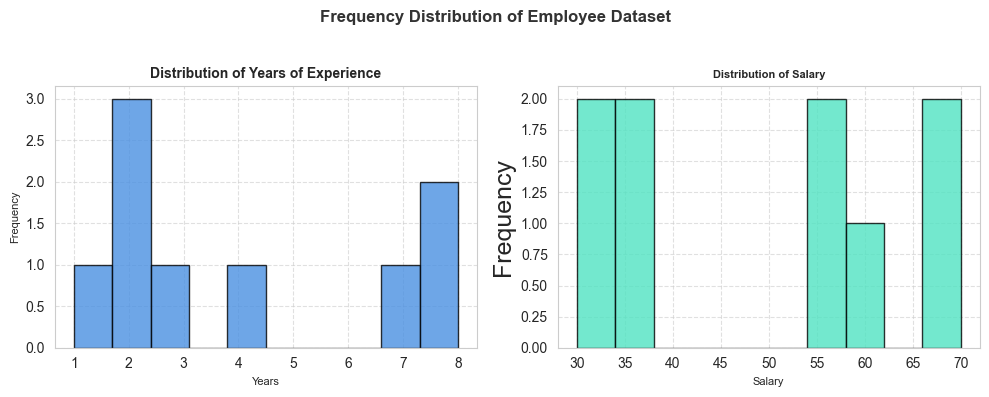

In [32]:
# Frequency distribution of the employee dataset
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Ploting histogram for Years
axes[0].hist(employee["Years"], bins=10, color="#4A90E2", edgecolor='black', alpha=0.8)
axes[0].set_title("Distribution of Years of Experience", fontsize=10, weight='bold')
axes[0].set_xlabel("Years", fontsize=8)
axes[0].set_ylabel("Frequency", fontsize=8)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Ploting histogram for Salary
axes[1].hist(employee["Salary"], bins=10, color="#50E3C2", edgecolor='black', alpha=0.8)
axes[1].set_title("Distribution of Salary", fontsize=8, weight='bold')
axes[1].set_xlabel("Salary", fontsize=8)
axes[1].set_ylabel("Frequency", fontsize=18)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Add a main title and adjust spacing
fig.suptitle("Frequency Distribution of Employee Dataset", fontsize=12, weight='bold', color="#333333")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show plot
plt.show()


The Years of Experience distribution indicates that most employees have between 1–3 years of experience, with fewer having higher experience levels such as 7–8 years. This suggests the workforce is relatively young or newly hired.

The Salary distribution shows a similar pattern, where most employees earn between 30–35k and 55–70k, with gaps in the middle range. This could reflect differences in job titles, experience levels, or departments.

#### What's the average salary in this company?

In [35]:
# Average salary in the company

avg_salary = employee['Salary'].mean()
print(f"The average salary in the company is: {avg_salary:.2f}")

The average salary in the company is: 48.89


#### What's the highest salary?

In [37]:
# Highest Salary

highest_salary = employee['Salary'].max()
print(f"The highest salary in the company is: {highest_salary:.2f}")

The highest salary in the company is: 70.00


#### What's the lowest salary?

In [39]:
# Lowest Salary

lowest_salary = employee['Salary'].min()
print(f"The lowest salary in the company is: {lowest_salary:.2f}")

The lowest salary in the company is: 30.00


#### Who are the employees with the lowest salary?

In [41]:
# Employees with the lowest salary

employees_wit_lowest_sal = employee[employee['Salary'] == lowest_salary]
display(employees_wit_lowest_sal)

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [43]:
# Info about Davie
info_david = employee[employee['Name'] == "David"]
display(info_david)

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [45]:
# Only David's salary

david_salary = employee.loc[employee["Name"] == "David", "Salary"].values[0]
print(f"David's salary is: {david_salary}")

David's salary is: 30


#### Print all the rows where job title is associate

In [47]:
# Filtering job titiles 

job_associate = employee[employee["Title"] == "associate"]
display(job_associate)

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [49]:
# Displaying the first 3 rows using head()
display(employee.head(3))

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [50]:
# Displaying the first 3 rows using slicing
display(employee[:3])

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [52]:
# Employees who's title is associate and the salary above 55

condition_emp = (employee['Title'] == 'associate') & (employee['Salary'] > 55)
employee_associate_55 = employee[(condition_emp)]
display(employee_associate_55)

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [54]:
# Computing the average salaries of each group

avg_salary_by_years = employee.groupby("Years")["Salary"].mean().reset_index()
display(avg_salary_by_years)


,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [56]:
# Average salary by title

avg_salary_by_title = employee.groupby("Title")["Salary"].mean().reset_index()
display(avg_salary_by_title)

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

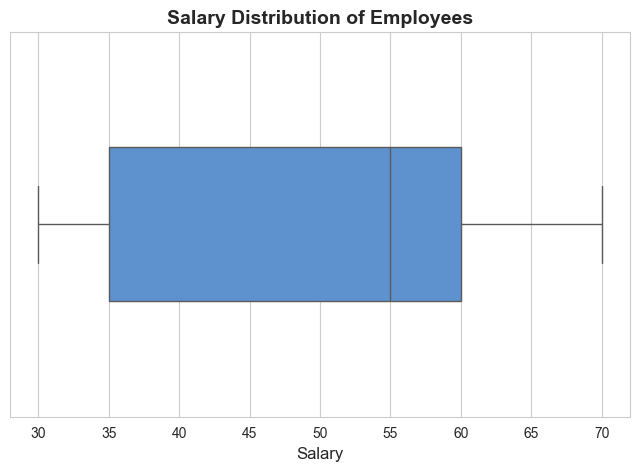

In [58]:
# Visual summary of the data using boxplot

sns.set_style("whitegrid")

# Creating the boxplot for Salary
plt.figure(figsize=(8, 5))
sns.boxplot(x=employee["Salary"], color="#4A90E2", width=0.4)

plt.title("Salary Distribution of Employees", fontsize=14, weight='bold')
plt.xlabel("Salary", fontsize=12)
plt.show()

Q1 = employee["Salary"].quantile(0.25)
Q3 = employee["Salary"].quantile(0.75)

In [59]:
# printing first quartile

print(f"First Quartile (Q1): {Q1:.2f}")

First Quartile (Q1): 35.00


In [60]:
# printing third quartile

print(f"Third Quartile (Q3): {Q3:.2f}")

Third Quartile (Q3): 60.00


#### Is the mean salary per gender different?

In [62]:
# Group by Gender and calculate mean salary
mean_salary_by_gender = employee.groupby("Gender")["Salary"].mean().reset_index()

# Display the result
display(mean_salary_by_gender)

,Gender,Salary
0,F,47.5
1,M,50.0


### The average salary of male employees (50.0) is slightly higher than that of female employees (47.5).

### While the difference is small (about 2.5 units), it still indicates that men earn more on average than women in this dataset.

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [65]:
# Finding the minimum, mean and the maximum of numeric columns for each Department

# Selecting only numeric columns before grouping
numeric_cols = employee.select_dtypes(include=["number"])

dept_summary = employee.groupby("Department")[numeric_cols.columns].agg(["min", "mean", "max"])
display(dept_summary)

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [67]:
# your answer here


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [70]:
# Importing the Orders.csv dataset

order_data = pd.read_csv('Orders.csv')
display(order_data.head())

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [72]:
# Exploring the datasets

# Selecting only numeric columns before grouping
numeric_cols = order_data.select_dtypes(include=["number"])

# Printing the data types 
print("\nData Types of Each Column:")
print(temp.dtypes)

print("\nStatistical Summary:")
display(numeric_cols.describe().T)


Data Types of Each Column:
City            object
State           object
Temperature    float64
dtype: object

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


#### The dataset contains a mix of categorical and numerical variables. The categorical columns are City and State, representing location-based information, while Temperature is numerical, suitable for statistical analysis.

#### From the statistical summary, it is evident that most transactions occurred around the year 2011. Variables such as month, day, and hour show a moderate spread, indicating that transactions were distributed fairly evenly across different times of the year and day. However, the numerical variables Quantity, UnitPrice, and amount_spent show very high standard deviations and extreme maximum values. This suggests the presence of significant outliers.

####  What is the average Purchase Price?

In [75]:
# Average Purchase price

avg_purchase_price = order_data['UnitPrice'].mean()
print(f"The average purchase price is: {avg_purchase_price:.2f}")

The average purchase price is: 3.12


#### What were the highest and lowest purchase prices? 

In [77]:
# Highest Purchase price

highest_purchase_price = order_data['UnitPrice'].max()
print(f"The highest purchase price is: {highest_purchase_price:.2f}")

The highest purchase price is: 8142.75


In [78]:
# Lowest Purchase price

lowest_purchase_price = order_data['UnitPrice'].min()
print(f"The lowest purchase price is: {lowest_purchase_price:.2f}")

The lowest purchase price is: 0.00


#### Select all the customers we have in Spain

In [80]:
# Selecting all the customers in Spain

customers_spain = order_data[order_data['Country'] == 'Spain']
display(customers_spain)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [82]:
# Number of Customers in Spain

num_customers_spain = order_data[order_data['Country'] == 'Spain'].shape[0]
print(f"The number of customers in Spain is: {num_customers_spain}")

The number of customers in Spain is: 2485


#### Select all the customers who have bought more than 50 items ?

In [130]:
# Customers who have bought more than 50 items 

customers_more_50 = order_data[order_data['Quantity'] > 50]
display(customers_more_50)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select orders from Spain that are above 50 items

In [128]:
# Orders from Spain that are above 50 items

spain_above_50 = order_data[(order_data['Country'] == 'Spain') & (order_data['Quantity'] > 50)]
display(spain_above_50)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [132]:
# Selecting all free orders

free_orders = order_data[order_data["UnitPrice"] == 0]
display(free_orders)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [136]:
# Selecting all orders that are 'lunch bag'

lunch_bag_orders = order_data[order_data["Description"].str.contains("lunch bag", case=False, na=False)]
display(lunch_bag_orders)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# Selecting all orders that are made in 2011 and are 'lunch bag'

condition_2011_lunch_bag = (order_data['year']) & (lunch_bag_orders)

#### Show the frequency distribution of the amount spent in Spain.

In [140]:
# Selecting all orders that are made in 2011 and are 'lunch bag'

orders_2011_lunch_bag = order_data[(order_data['year']) & (order_data["Description"].str.contains("lunch bag", case=False, na=False))]
display(orders_2011_lunch_bag)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders made in the month of August

In [142]:
# Selecting all orders made in the month of August

orders_august = order_data[order_data['month'] == 8]
display(orders_august)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


# Count how many orders were made by each country
orders_by_country_august = august_orders["Country"].value_counts()

# Display the results
display(orders_by_country_august)#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [144]:
# Selecting the number of orders made by countries in the month of August

orders_by_country_august = orders_august["Country"].value_counts()
display(orders_by_country_august)

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### What's the  average amount of money spent by country

In [148]:
# average amount of money spent by country

avg_spent_by_country = order_data.groupby("Country")["amount_spent"].mean().reset_index()
display(avg_spent_by_country)

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [152]:
# The most expensive item

expensive_item = order_data.loc[order_data['UnitPrice'].idxmax()]
display(expensive_item)

Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object

#### What was the average amount spent per year ?

In [156]:
# Average amount spent per year


avg_amount_per_year = order_data.groupby("year")["amount_spent"].mean().reset_index()
display(avg_amount_per_year)

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
